In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
# Import population csv and drop unnecessary columns
population_df = pd.read_csv("../resources/census_api/census_population_data.csv")
population_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
population_df.head()

,geo_id,population,avg_household_size
0,0500000US06033,64148,2.43
1,0500000US06043,17540,2.13
2,0500000US06115,75493,2.83
3,0500000US06013,1133247,2.86
4,0500000US06035,31185,2.23


In [3]:
# Read in fcc_summary_data and drop duplicate/unnecessary columns
fcc_summary_df = pd.read_csv("../resources/fcc/fcc_ml_summary_final.csv")
fcc_summary_df.head()

,geo_id,dl_speed_100_ua,dl_speed_level_up,level_up_access_pop_percent
0,0500000US06001,25.0,100.0,0.989920
1,0500000US06003,25.0,100.0,0.116918
2,0500000US06005,25.0,100.0,0.325451
3,0500000US06007,25.0,100.0,0.878172
4,0500000US06009,25.0,100.0,0.812635


In [4]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(population_df, fcc_summary_df, on =["geo_id"])
internet_access_df.head()

,geo_id,population,avg_household_size,dl_speed_100_ua,dl_speed_level_up,level_up_access_pop_percent
0,0500000US06033,64148,2.43,25.0,100.0,0.880890
1,0500000US06043,17540,2.13,25.0,100.0,0.407778
2,0500000US06115,75493,2.83,25.0,100.0,0.758733
3,0500000US06013,1133247,2.86,25.0,100.0,0.976652
4,0500000US06035,31185,2.23,25.0,100.0,0.517515


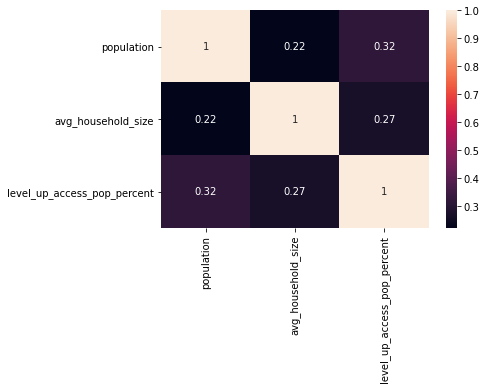

In [5]:
# New df for coreelation matrix and hot map
fcc_pop_corr_df = internet_access_df
fcc_pop_corr_df.drop(['dl_speed_100_ua', 'dl_speed_level_up'], axis = 1, inplace = True)
corrMatrix = fcc_pop_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
# Read in census_sex_data and drop duplicate columns
census_sex_df = pd.read_csv("../resources/census_api/census_sex_data.csv")
census_sex_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_sex_df.head()

,geo_id,sex_total_men,sex_total_women
0,0500000US06033,31879,32269
1,0500000US06043,8920,8620
2,0500000US06115,38468,37025
3,0500000US06013,553701,579546
4,0500000US06035,20671,10514


In [7]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_sex_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 4:] = perct[:, 4:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149


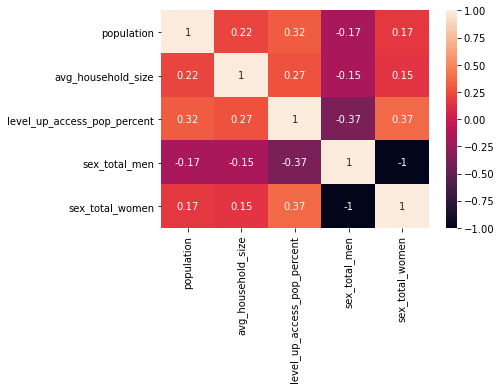

In [8]:
# New df for coreelation matrix and hot map
sex_corr_df = internet_access_df
corrMatrix = sex_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

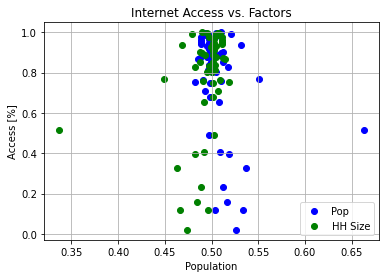

In [9]:
plt.scatter(internet_access_df.sex_total_men, internet_access_df.level_up_access_pop_percent, color='blue', label="Pop")
plt.scatter(internet_access_df.sex_total_women, internet_access_df.level_up_access_pop_percent, color='green', label='HH Size')



plt.legend(loc="lower right")
plt.title("Internet Access vs. Factors")
plt.xlabel("Population")
plt.ylabel("Access [%]")
plt.grid()
plt.show()

In [10]:
internet_access_df.shape

(58, 6)

In [11]:
# Read in census_race_data and drop duplicate/unnecessary columns
census_race_df = pd.read_csv("../resources/census_api/census_race_data.csv")
census_race_df.drop(['race_total_population', 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_race_df.head()

,geo_id,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone
0,0500000US06033,12830,51318,2090,642,1426,30,142,1365,1348,17,45623
1,0500000US06043,1909,15631,390,243,166,54,20,633,627,6,14125
2,0500000US06115,20990,54503,643,4977,2340,292,126,4040,3982,58,42085
3,0500000US06013,288101,845146,2376,182135,93683,5251,3829,54921,53181,1740,502951
4,0500000US06035,5834,25351,847,436,2695,205,22,618,559,59,20528


In [12]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_race_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 6:] = perct[:, 6:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,0.022230,0.000468,0.002214,0.021279,0.021014,0.000265,0.711215
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,0.009464,0.003079,0.001140,0.036089,0.035747,0.000342,0.805302
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,0.030996,0.003868,0.001669,0.053515,0.052747,0.000768,0.557469
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,0.082668,0.004634,0.003379,0.048463,0.046928,0.001535,0.443814
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,0.086420,0.006574,0.000705,0.019817,0.017925,0.001892,0.658265


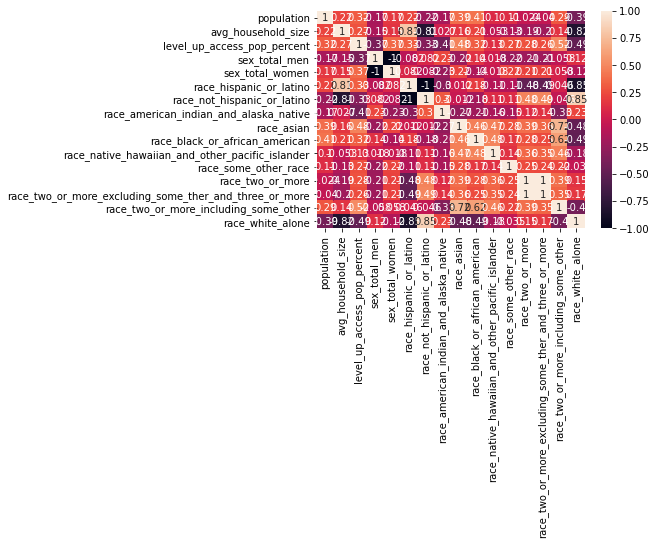

In [13]:
# New df for coreelation matrix and hot map
race_corr_df = internet_access_df
corrMatrix = race_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

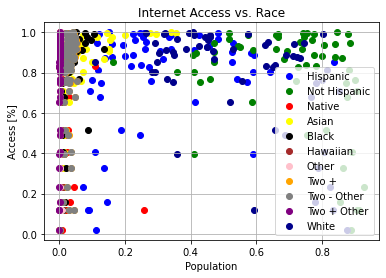

In [14]:
plt.scatter(internet_access_df.race_hispanic_or_latino, internet_access_df.level_up_access_pop_percent, color='blue', label="Hispanic")
plt.scatter(internet_access_df.race_not_hispanic_or_latino, internet_access_df.level_up_access_pop_percent, color='green', label="Not Hispanic")
plt.scatter(internet_access_df.race_american_indian_and_alaska_native, internet_access_df.level_up_access_pop_percent, color='red', label="Native")
plt.scatter(internet_access_df.race_asian, internet_access_df.level_up_access_pop_percent, color='yellow', label="Asian")
plt.scatter(internet_access_df.race_black_or_african_american, internet_access_df.level_up_access_pop_percent, color='black', label="Black")
plt.scatter(internet_access_df.race_native_hawaiian_and_other_pacific_islander, internet_access_df.level_up_access_pop_percent, color='brown', label="Hawaiian")
plt.scatter(internet_access_df.race_some_other_race, internet_access_df.level_up_access_pop_percent, color='pink', label="Other")
plt.scatter(internet_access_df.race_two_or_more, internet_access_df.level_up_access_pop_percent, color='orange', label="Two +")
plt.scatter(internet_access_df.race_two_or_more_excluding_some_ther_and_three_or_more, internet_access_df.level_up_access_pop_percent, color='grey', label="Two - Other")
plt.scatter(internet_access_df.race_two_or_more_including_some_other, internet_access_df.level_up_access_pop_percent, color='purple', label="Two + Other")
plt.scatter(internet_access_df.race_white_alone, internet_access_df.level_up_access_pop_percent, color='DarkBlue', label="White")


plt.legend(loc="lower right")
plt.title("Internet Access vs. Race")
plt.xlabel("Population")
plt.ylabel("Access [%]")
plt.grid()
plt.show()

In [15]:
internet_access_df.shape

(58, 17)

In [16]:
# Read in census_occupation_data and drop duplicate/unnecessary columns
census_occupation_df = pd.read_csv("../resources/census_api/census_occupation_data.csv")
census_occupation_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_occupation_df.head()

,geo_id,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving
0,0500000US06033,23589,6424,6385,4546,3687,2547
1,0500000US06043,7051,2043,2154,1485,657,712
2,0500000US06115,28954,7773,5950,6599,4331,4301
3,0500000US06013,547323,240244,96666,118637,42681,49095
4,0500000US06035,8788,2562,2328,1768,1032,1098


In [17]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_occupation_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 17:] = perct[:, 17:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.021279,0.021014,0.000265,0.711215,0.367728,0.100143,0.099535,0.070867,0.057476,0.039705
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.036089,0.035747,0.000342,0.805302,0.401995,0.116477,0.122805,0.084664,0.037457,0.040593
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.053515,0.052747,0.000768,0.557469,0.383532,0.102963,0.078815,0.087412,0.057370,0.056972
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.048463,0.046928,0.001535,0.443814,0.482969,0.211996,0.085300,0.104688,0.037663,0.043322
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.019817,0.017925,0.001892,0.658265,0.281802,0.082155,0.074651,0.056694,0.033093,0.035209


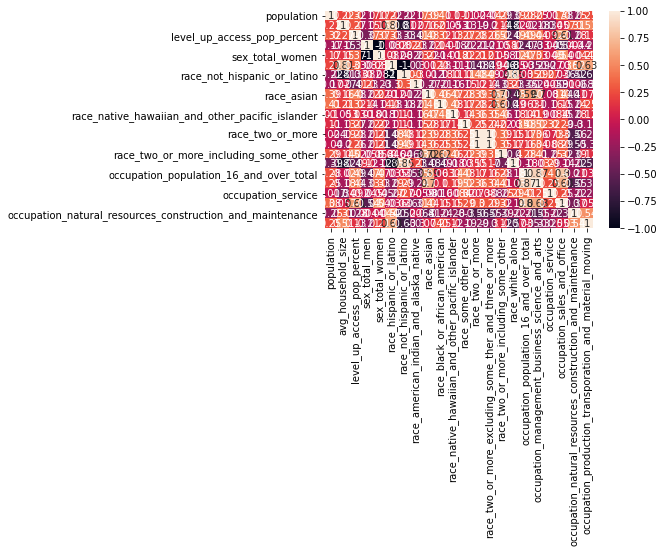

In [18]:
# New df for coreelation matrix and hot map
ocp_corr_df = internet_access_df
corrMatrix = ocp_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
internet_access_df.shape

(58, 23)

In [20]:
# Read in census_internet_data and drop duplicate/unnecessary columns
census_internet_df = pd.read_csv("../resources/census_api/census_internet_data.csv")
census_internet_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_internet_df.head()

,geo_id,hh_with_computer_and_internet_total,hh_with_computer,hh_with_bb_internet_subscription
0,0500000US06033,25966,21733,18861
1,0500000US06043,7700,6710,5861
2,0500000US06115,26179,23373,21034
3,0500000US06013,392277,370116,353692
4,0500000US06035,9493,7990,7227


In [21]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_internet_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 23:] = perct[:, 23:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,race_white_alone,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving,hh_with_computer_and_internet_total,hh_with_computer,hh_with_bb_internet_subscription
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.711215,0.367728,0.100143,0.099535,0.070867,0.057476,0.039705,0.404783,0.338795,0.294023
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.805302,0.401995,0.116477,0.122805,0.084664,0.037457,0.040593,0.438997,0.382554,0.334151
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.557469,0.383532,0.102963,0.078815,0.087412,0.057370,0.056972,0.346774,0.309605,0.278622
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.443814,0.482969,0.211996,0.085300,0.104688,0.037663,0.043322,0.346153,0.326598,0.312105
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.658265,0.281802,0.082155,0.074651,0.056694,0.033093,0.035209,0.304409,0.256213,0.231746


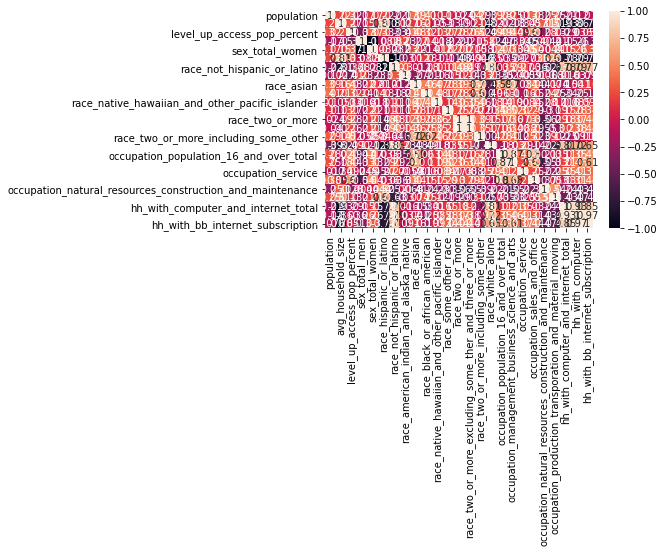

In [22]:
# New df for coreelation matrix and hot map
int_corr_df = internet_access_df
corrMatrix = int_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
internet_access_df.shape

(58, 26)

In [24]:
# Read in census_industry_data and drop duplicate/unnecessary columns
census_industry_df = pd.read_csv("../resources/census_api/census_industry_data.csv")
census_industry_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_industry_df.head()

,geo_id,industry_agriculture_forestry_fishing_and_hunting_and_mining,industry_construction,industry_manufacturing,industry_wholesale_trade,industry_retail_trade,industry_transportation_and_warehousing_and_utilities,industry_information,industry_finance_and_insurance_real_estate_and_rental_and_leasing,industry_professional_scientific_management_administrative_and_waste_management_services,industry_educational_services_health_care_and_social_assistance,industry_arts_entertainment_recreation_accommodation_and_food_services,industry_other_services_except_public_administration,industry_public_administration
0,0500000US06033,1658,2083,909,382,2759,1121,313,724,2590,5898,1978,1301,1873
1,0500000US06043,270,304,348,92,816,244,74,214,739,1221,1791,167,771
2,0500000US06115,1230,2700,1689,698,3754,1415,586,1215,2803,6188,2642,1246,2788
3,0500000US06013,3698,38721,36881,12747,56545,28780,15140,46505,88220,120380,49287,28545,21874
4,0500000US06035,585,587,151,102,705,284,93,218,307,1945,614,253,2944


In [25]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_industry_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 26:] = perct[:, 26:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,industry_wholesale_trade,industry_retail_trade,industry_transportation_and_warehousing_and_utilities,industry_information,industry_finance_and_insurance_real_estate_and_rental_and_leasing,industry_professional_scientific_management_administrative_and_waste_management_services,industry_educational_services_health_care_and_social_assistance,industry_arts_entertainment_recreation_accommodation_and_food_services,industry_other_services_except_public_administration,industry_public_administration
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.005955,0.043010,0.017475,0.004879,0.011286,0.040375,0.091944,0.030835,0.020281,0.029198
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.005245,0.046522,0.013911,0.004219,0.012201,0.042132,0.069612,0.102109,0.009521,0.043957
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.009246,0.049726,0.018743,0.007762,0.016094,0.037129,0.081968,0.034997,0.016505,0.036931
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.011248,0.049896,0.025396,0.013360,0.041037,0.077847,0.106226,0.043492,0.025189,0.019302
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.003271,0.022607,0.009107,0.002982,0.006991,0.009844,0.062370,0.019689,0.008113,0.094404


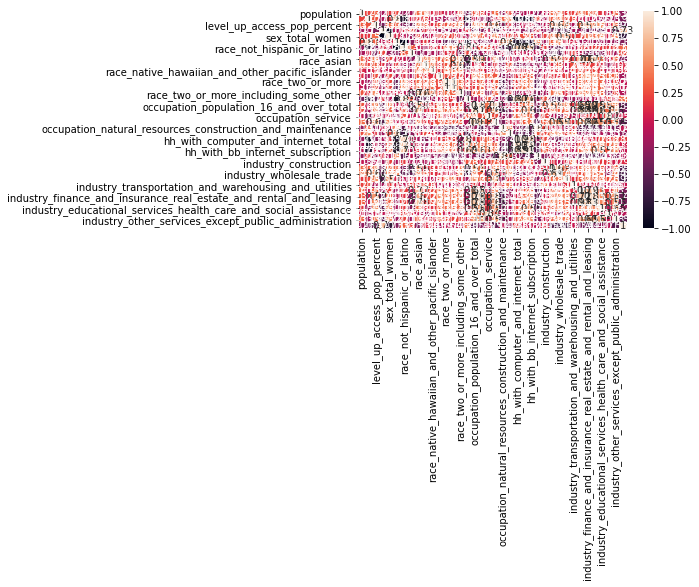

In [26]:
# New df for coreelation matrix and hot map
ind_corr_df = internet_access_df
corrMatrix = ind_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [27]:
internet_access_df.shape

(58, 39)

In [28]:
# Read in census_income_data and drop duplicate/unnecessary columns
census_income_df = pd.read_csv("../resources/census_api/census_income_data.csv")
census_income_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
# Combined 150k and 200k+ columns because they are correlated
census_income_df['hh_with_income_150000_and_greater'] = census_income_df['hh_with_income_150000-199999'] + census_income_df['hh_with_income_200000_and_greater']
census_combined_income_df = census_income_df.drop([ 'hh_with_income_150000-199999', 'hh_with_income_200000_and_greater'], axis=1, inplace=True)
census_combined_income_df = census_income_df[census_income_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 10, 11]]]
census_combined_income_df.head()

,geo_id,hh_with_income_total,hh_with_income_less_than_10000,hh_with_income_10000-14999,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000_and_greater,hh_median_income,hh_mean_income
0,0500000US06033,25966,2374,2051,3203,3247,3607,4030,3178,2609,1667,42475,60847
1,0500000US06043,7700,494,484,934,711,1133,1465,1060,873,546,51199,64590
2,0500000US06115,26179,1289,1879,2835,2497,3956,4744,3264,3591,2124,52624,67391
3,0500000US06013,392277,13870,11757,21416,22514,34834,54684,48475,74344,110383,93712,128079
4,0500000US06035,9493,497,609,941,909,1150,1979,1171,1388,849,56362,71097


In [29]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_combined_income_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 39:49] = perct[:, 39:49]/perct[:, 1, None] 
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_with_income_10000-14999,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000_and_greater,hh_median_income,hh_mean_income
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.031973,0.049931,0.050617,0.056229,0.062823,0.049542,0.040672,0.025987,42475,60847
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.027594,0.053250,0.040536,0.064595,0.083523,0.060433,0.049772,0.031129,51199,64590
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.024890,0.037553,0.033076,0.052402,0.062840,0.043236,0.047567,0.028135,52624,67391
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.010375,0.018898,0.019867,0.030738,0.048254,0.042775,0.065603,0.097404,93712,128079
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.019529,0.030175,0.029149,0.036877,0.063460,0.037550,0.044509,0.027225,56362,71097


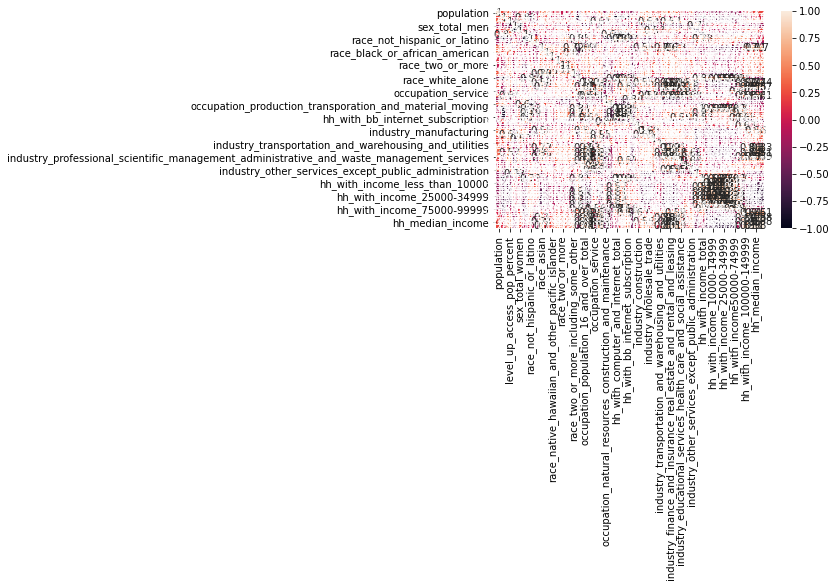

In [30]:
# New df for coreelation matrix and hot map
inc_corr_df = internet_access_df
corrMatrix = inc_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [31]:
internet_access_df.shape

(58, 51)

In [32]:
# Read in census_family_structure_data and drop duplicate/unnecessary columns
census_family_structure_df = pd.read_csv("../resources/census_api/census_family_structure_data.csv")
census_family_structure_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_family_structure_df.head()

,geo_id,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18
0,0500000US06033,25966,6757,19209
1,0500000US06043,7700,1922,5778
2,0500000US06115,26179,10190,15989
3,0500000US06013,392277,141689,250588
4,0500000US06035,9493,2417,7076


In [33]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_family_structure_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 51:] = perct[:, 51:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000_and_greater,hh_median_income,hh_mean_income,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.056229,0.062823,0.049542,0.040672,0.025987,42475,60847,0.404783,0.105335,0.299448
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.064595,0.083523,0.060433,0.049772,0.031129,51199,64590,0.438997,0.109578,0.329418
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.052402,0.062840,0.043236,0.047567,0.028135,52624,67391,0.346774,0.134979,0.211794
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.030738,0.048254,0.042775,0.065603,0.097404,93712,128079,0.346153,0.125029,0.221124
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.036877,0.063460,0.037550,0.044509,0.027225,56362,71097,0.304409,0.077505,0.226904


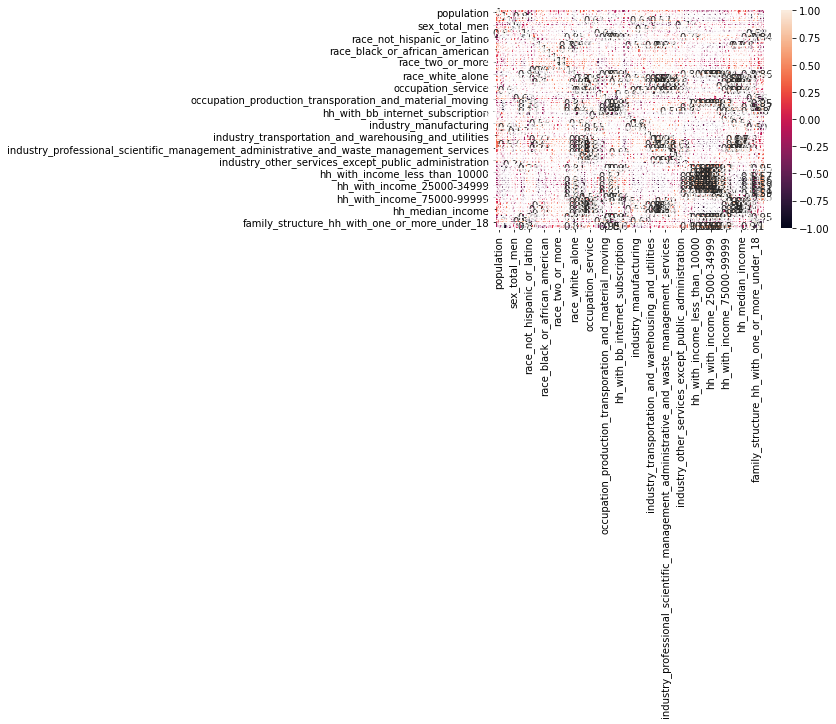

In [34]:
# New df for coreelation matrix and hot map
fam_corr_df = internet_access_df
corrMatrix = fam_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
internet_access_df.shape

(58, 54)

In [36]:
# Read in census_employment_data and drop duplicate/unnecessary columns
census_employment_df = pd.read_csv("../resources/census_api/census_employment_data.csv")
census_employment_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_employment_df.head()

,geo_id,employment_16_and_over_in_labor_force,employment_employed,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate
0,0500000US06033,26145,23589,2556,26171,9.8
1,0500000US06043,7727,7051,676,7284,8.7
2,0500000US06115,31602,28954,2648,23343,8.4
3,0500000US06013,582886,547323,35563,318646,6.1
4,0500000US06035,9358,8788,570,17347,6.1


In [37]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_employment_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 54:58] = perct[:, 54:58]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_median_income,hh_mean_income,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18,employment_16_and_over_in_labor_force,employment_employed,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,42475,60847,0.404783,0.105335,0.299448,0.407573,0.367728,0.039845,0.407978,9.8
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,51199,64590,0.438997,0.109578,0.329418,0.440536,0.401995,0.038540,0.415279,8.7
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,52624,67391,0.346774,0.134979,0.211794,0.418608,0.383532,0.035076,0.309207,8.4
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,93712,128079,0.346153,0.125029,0.221124,0.514350,0.482969,0.031382,0.281180,6.1
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,56362,71097,0.304409,0.077505,0.226904,0.300080,0.281802,0.018278,0.556261,6.1


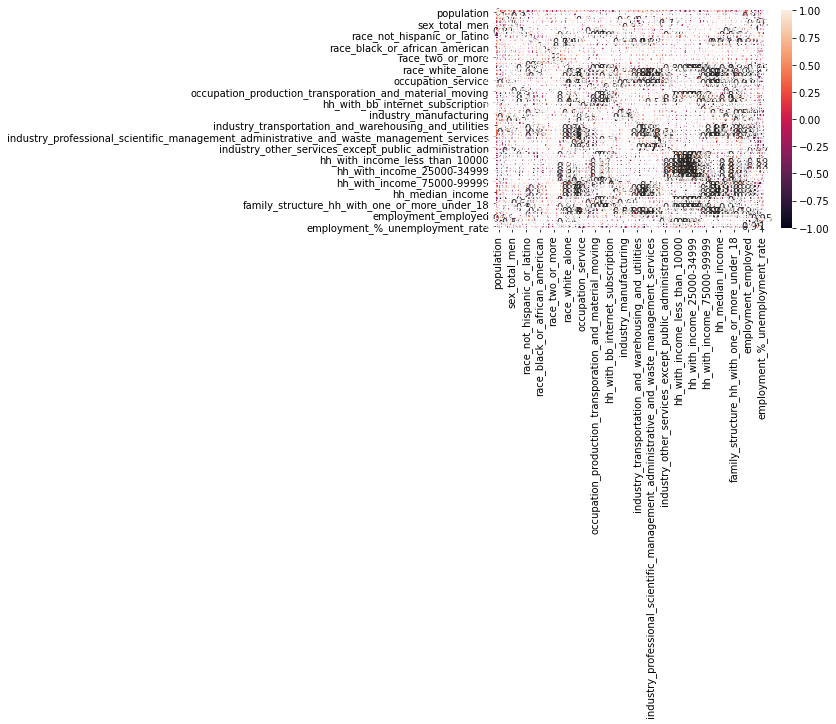

In [38]:
# New df for coreelation matrix and hot map
emp_corr_df = internet_access_df
corrMatrix = emp_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [39]:
internet_access_df.shape

(58, 59)

In [40]:
# Read in census_education_data and drop duplicate/unnecessary columns
census_education_df = pd.read_csv("../resources/census_api/census_education_data.csv")
census_education_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
# Combined bachelors and graduate+ columns because they are correlated
census_education_df['%_eduction_population_25_and_over_bachelors_degree_or_more'] = census_education_df['%_eduction_population_25_and_over_bachelors_degree'] + census_education_df['%_eduction_population_25_and_over_graduate_or_professional_degree']
census_education_df.drop(['%_eduction_population_25_and_over_bachelors_degree', '%_eduction_population_25_and_over_graduate_or_professional_degree'], axis=1, inplace=True)
# census_combined_education_df = census_education_df[census_education_df.columns[[]]]
census_education_df.head()

,geo_id,%_eduction_population_25_and_over_less_than_9th_grade,%_eduction_population_25_and_over_9th-12th_no_diploma,%_eduction_population_25_and_over_high_school_graduate,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree_or_more
0,0500000US06033,5.6,9.2,30.1,27.8,11.5,15.8
1,0500000US06043,3.2,6.4,26.5,30.6,9.8,23.4
2,0500000US06115,7.6,10.3,23.1,31.2,11.0,16.6
3,0500000US06013,5.8,4.9,17.6,21.8,8.3,41.7
4,0500000US06035,3.8,13.4,33.2,27.8,9.7,12.1


In [41]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_education_df, on =["geo_id"])
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,employment_employed,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate,%_eduction_population_25_and_over_less_than_9th_grade,%_eduction_population_25_and_over_9th-12th_no_diploma,%_eduction_population_25_and_over_high_school_graduate,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree_or_more
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.367728,0.039845,0.407978,9.8,5.6,9.2,30.1,27.8,11.5,15.8
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.401995,0.038540,0.415279,8.7,3.2,6.4,26.5,30.6,9.8,23.4
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.383532,0.035076,0.309207,8.4,7.6,10.3,23.1,31.2,11.0,16.6
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.482969,0.031382,0.281180,6.1,5.8,4.9,17.6,21.8,8.3,41.7
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.281802,0.018278,0.556261,6.1,3.8,13.4,33.2,27.8,9.7,12.1


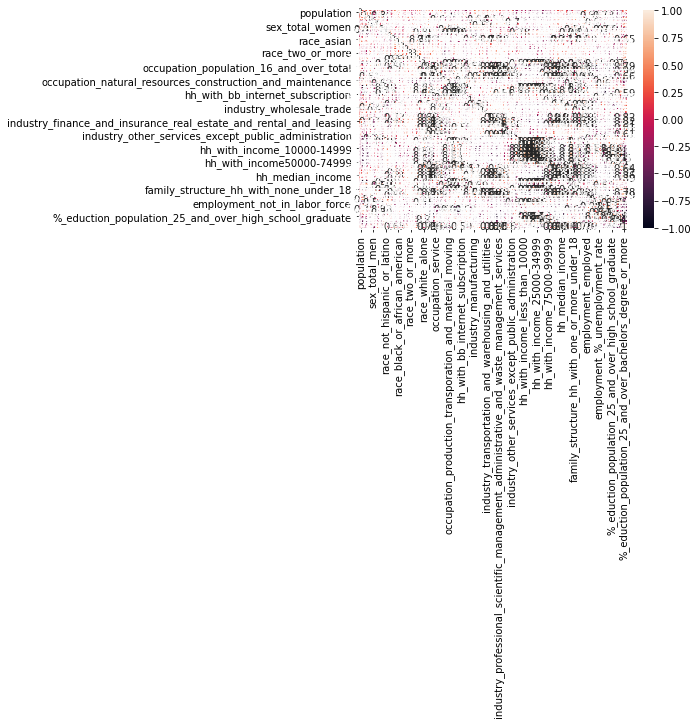

In [42]:
# New df for coreelation matrix and hot map
edu_corr_df = internet_access_df
corrMatrix = edu_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [43]:
internet_access_df.shape

(58, 65)

In [44]:
# Read in census_disability_data and drop duplicate/unnecessary columns
census_disability_df = pd.read_csv("../resources/census_api/census_disability_data.csv")
census_disability_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_disability_df.head()

,geo_id,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability
0,0500000US06033,13272,36442,13737,399,6505,5862
1,0500000US06043,2860,9845,4665,145,1528,1527
2,0500000US06115,20850,43487,9002,1049,6852,3671
3,0500000US06013,260902,699892,167209,9942,62588,54212
4,0500000US06035,4891,12457,4028,269,1807,1523


In [45]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_disability_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 65:] = perct[:, 65:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,%_eduction_population_25_and_over_high_school_graduate,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree_or_more,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,30.1,27.8,11.5,15.8,0.206897,0.568093,0.214145,0.006220,0.101406,0.091382
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,26.5,30.6,9.8,23.4,0.163056,0.561288,0.265964,0.008267,0.087115,0.087058
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,23.1,31.2,11.0,16.6,0.276185,0.576040,0.119243,0.013895,0.090763,0.048627
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,17.6,21.8,8.3,41.7,0.230225,0.617599,0.147549,0.008773,0.055229,0.047838
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,33.2,27.8,9.7,12.1,0.156838,0.399455,0.129165,0.008626,0.057945,0.048838


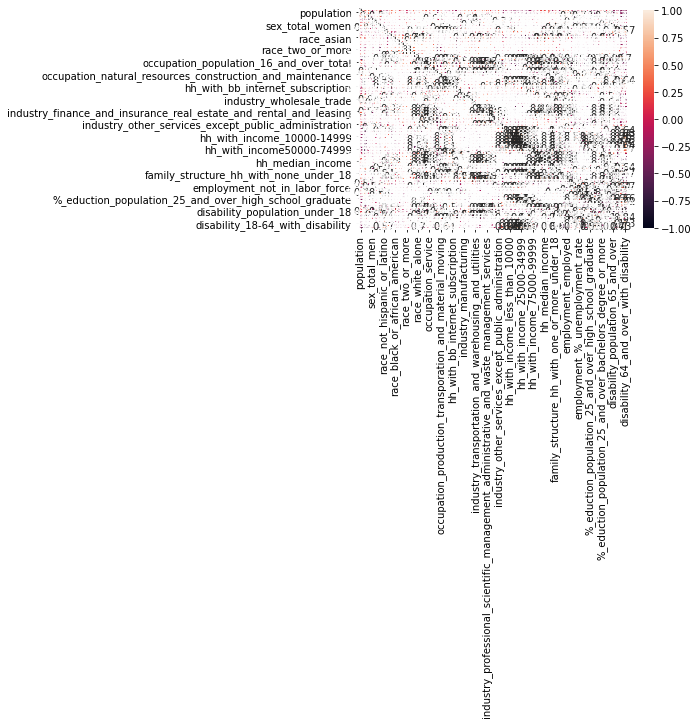

In [46]:
# New df for coreelation matrix and hot map
dis_corr_df = internet_access_df
corrMatrix = dis_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [47]:
internet_access_df.shape

(58, 71)

In [48]:
# Read in census_citizenship_data and drop duplicate/unnecessary columns
census_citizenship_df = pd.read_csv("../resources/census_api/census_citizenship_data.csv")
census_citizenship_df.drop(['citizenship_total_population', 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_citizenship_df.head()

,geo_id,citizenship_native_born,citizenship_foreign_born
0,0500000US06033,58466,5682
1,0500000US06043,16293,1247
2,0500000US06115,66060,9433
3,0500000US06013,850039,283208
4,0500000US06035,29559,1626


In [49]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_citizenship_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 71:] = perct[:, 71:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree_or_more,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability,citizenship_native_born,citizenship_foreign_born
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,11.5,15.8,0.206897,0.568093,0.214145,0.006220,0.101406,0.091382,0.911424,0.088576
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,9.8,23.4,0.163056,0.561288,0.265964,0.008267,0.087115,0.087058,0.928905,0.071095
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,11.0,16.6,0.276185,0.576040,0.119243,0.013895,0.090763,0.048627,0.875048,0.124952
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,8.3,41.7,0.230225,0.617599,0.147549,0.008773,0.055229,0.047838,0.750092,0.249908
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,9.7,12.1,0.156838,0.399455,0.129165,0.008626,0.057945,0.048838,0.947860,0.052140


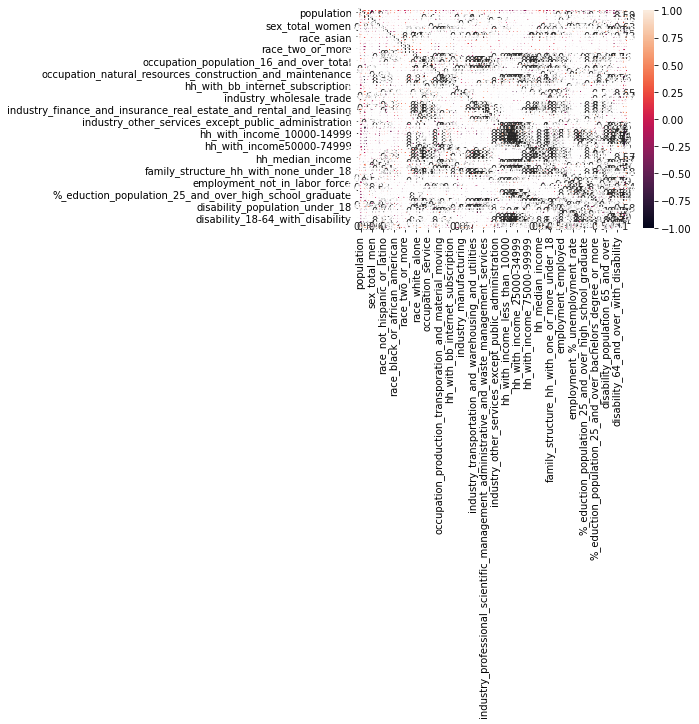

In [50]:
# New df for coreelation matrix and hot map
cit_corr_df = internet_access_df
corrMatrix = cit_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

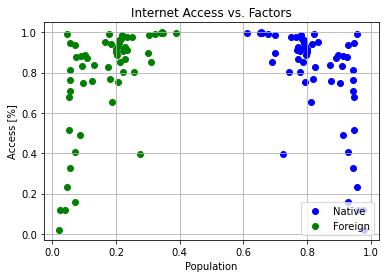

In [51]:
plt.scatter(internet_access_df.citizenship_native_born, internet_access_df.level_up_access_pop_percent, color='blue', label="Native")
plt.scatter(internet_access_df.citizenship_foreign_born, internet_access_df.level_up_access_pop_percent, color='green', label='Foreign')



plt.legend(loc="lower right")
plt.title("Internet Access vs. Factors")
plt.xlabel("Population")
plt.ylabel("Access [%]")
plt.grid()
plt.show()

In [52]:
internet_access_df

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree_or_more,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability,citizenship_native_born,citizenship_foreign_born
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,11.5,15.8,0.206897,0.568093,0.214145,0.006220,0.101406,0.091382,0.911424,0.088576
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,9.8,23.4,0.163056,0.561288,0.265964,0.008267,0.087115,0.087058,0.928905,0.071095
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,11.0,16.6,0.276185,0.576040,0.119243,0.013895,0.090763,0.048627,0.875048,0.124952
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,8.3,41.7,0.230225,0.617599,0.147549,0.008773,0.055229,0.047838,0.750092,0.249908
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,9.7,12.1,0.156838,0.399455,0.129165,0.008626,0.057945,0.048838,0.947860,0.052140
5,0500000US06083,443738,2.92,0.926085,0.500764,0.499236,0.450852,0.549148,0.003171,0.051823,...,7.7,33.8,0.223028,0.618099,0.143037,0.006513,0.045329,0.045813,0.771023,0.228977
6,0500000US06097,501317,2.60,0.950289,0.489104,0.510896,0.265271,0.734729,0.004125,0.039336,...,9.5,34.9,0.200472,0.612201,0.178849,0.006888,0.060231,0.053190,0.834558,0.165442
7,0500000US06025,180216,3.87,0.851398,0.511886,0.488114,0.837989,0.162011,0.005971,0.013184,...,6.3,14.5,0.286562,0.537483,0.123341,0.011758,0.062880,0.061626,0.689023,0.310977
8,0500000US06051,14174,2.86,0.827887,0.517920,0.482080,0.272753,0.727247,0.024129,0.023705,...,7.2,30.7,0.189714,0.658953,0.143220,0.005221,0.031748,0.027586,0.824397,0.175603
9,0500000US06001,1643700,2.81,0.989920,0.491070,0.508930,0.224531,0.775469,0.003217,0.293890,...,6.5,45.9,0.209360,0.656009,0.128808,0.005562,0.045856,0.041746,0.676195,0.323805


In [53]:
internet_access_df.shape

(58, 73)

In [54]:
# Read in census_age_data and drop duplicate/unnecessary columns
census_age_df = pd.read_csv("../resources/census_api/census_age_data.csv")
census_age_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_age_df['age_under_9'] = census_age_df['age_under_5'] + census_age_df['age_5-9']
census_age_df['age_60-84'] = census_age_df['age_60-64'] + census_age_df['age_65-74'] + census_age_df['age_75-84']
census_age_df.drop(['age_under_5', 'age_5-9', 'age_60-64', 'age_65-74', 'age_75-84'], axis=1, inplace=True)
census_combined_age_df = census_age_df[census_age_df.columns[[0, 9, 1, 2, 3, 4, 5, 6, 7, 10, 8]]]
census_combined_age_df.head()

,geo_id,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033,7511,3496,3516,3231,6973,6706,8097,5137,18106,1375
1,0500000US06043,1523,751,804,803,1885,1614,2284,1503,6017,356
2,0500000US06115,11922,5815,4955,5600,11930,9193,8410,4592,11959,1117
3,0500000US06013,138530,76328,72857,68013,143793,151683,164203,78858,217302,21680
4,0500000US06035,2656,1477,1444,3218,6287,4353,3899,1803,5645,403


In [55]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_combined_age_df, on =["geo_id"])
perct = internet_access_df.values
internet_access_df.iloc[:, 73:] = perct[:, 73:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.117089,0.054499,0.054811,0.050368,0.108702,0.104540,0.126224,0.080080,0.282254,0.021435
1,0500000US06043,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.086830,0.042816,0.045838,0.045781,0.107469,0.092018,0.130217,0.085690,0.343044,0.020296
2,0500000US06115,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.157922,0.077027,0.065635,0.074179,0.158028,0.121773,0.111401,0.060827,0.158412,0.014796
3,0500000US06013,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.122242,0.067353,0.064290,0.060016,0.126886,0.133848,0.144896,0.069586,0.191752,0.019131
4,0500000US06035,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.085169,0.047363,0.046304,0.103191,0.201603,0.139586,0.125028,0.057816,0.181017,0.012923


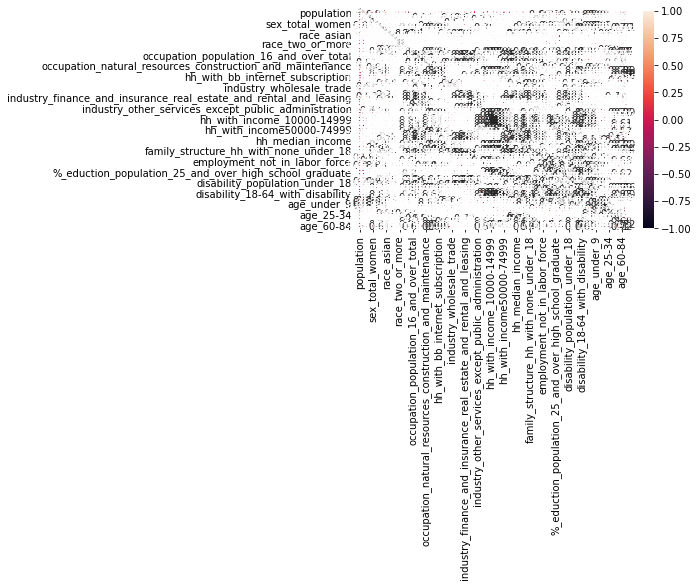

<Figure size 7200x7200 with 0 Axes>

In [56]:
# New df for coreelation matrix and hot map
age_corr_df = internet_access_df
corrMatrix = age_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(100, 100))
plt.show()

In [57]:
internet_access_df.shape

(58, 83)

In [58]:
# Import county csv dataset and drop unnecessary columns
county_df = pd.read_csv("../resources/census_api/county.csv")
county_df.drop(['county_id', 'state_id'], axis=1, inplace=True)
county_df.head()

,geo_id,county_name
0,0500000US06033,Lake County
1,0500000US06043,Mariposa County
2,0500000US06115,Yuba County
3,0500000US06013,Contra Costa County
4,0500000US06035,Lassen County


In [59]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(county_df, internet_access_df, on =["geo_id"])
internet_access_df.head()

,geo_id,county_name,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033,Lake County,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,...,0.117089,0.054499,0.054811,0.050368,0.108702,0.104540,0.126224,0.080080,0.282254,0.021435
1,0500000US06043,Mariposa County,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,...,0.086830,0.042816,0.045838,0.045781,0.107469,0.092018,0.130217,0.085690,0.343044,0.020296
2,0500000US06115,Yuba County,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,...,0.157922,0.077027,0.065635,0.074179,0.158028,0.121773,0.111401,0.060827,0.158412,0.014796
3,0500000US06013,Contra Costa County,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,...,0.122242,0.067353,0.064290,0.060016,0.126886,0.133848,0.144896,0.069586,0.191752,0.019131
4,0500000US06035,Lassen County,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,...,0.085169,0.047363,0.046304,0.103191,0.201603,0.139586,0.125028,0.057816,0.181017,0.012923


In [60]:
internet_access_df['ID'] = internet_access_df['geo_id'] + '-' + internet_access_df['county_name']
internet_access_df.drop(['geo_id', 'county_name'], axis = 1, inplace = True)
v = internet_access_df[list(internet_access_df.columns)[-1]]
internet_access_df = internet_access_df.drop(['ID'], axis = 1)
internet_access_df.insert(0, 'ID', v)
internet_access_df.head()

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,...,0.117089,0.054499,0.054811,0.050368,0.108702,0.104540,0.126224,0.080080,0.282254,0.021435
1,0500000US06043-Mariposa County,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,...,0.086830,0.042816,0.045838,0.045781,0.107469,0.092018,0.130217,0.085690,0.343044,0.020296
2,0500000US06115-Yuba County,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,...,0.157922,0.077027,0.065635,0.074179,0.158028,0.121773,0.111401,0.060827,0.158412,0.014796
3,0500000US06013-Contra Costa County,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,...,0.122242,0.067353,0.064290,0.060016,0.126886,0.133848,0.144896,0.069586,0.191752,0.019131
4,0500000US06035-Lassen County,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,...,0.085169,0.047363,0.046304,0.103191,0.201603,0.139586,0.125028,0.057816,0.181017,0.012923


In [62]:
# Export df as a csv
internet_access_df.to_csv("../resources/regression_ml_model/scaled_merged_internet_access.csv", index=False)